<a href="https://colab.research.google.com/github/Tiwari666/Time_Series/blob/main/SARIMA_TESLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tesla prices prediction using the auto ARIMA ans SARIMAX models**

In [20]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from scipy import stats
import seaborn as sns

#The pandas_datareader module is commonly used in Python for accessing financial data from various online sources, such as Yahoo Finance, Google Finance, and others.
#It provides functions and methods to retrieve historical market data, real-time data, and other financial information for analysis and visualization purposes.

In [21]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38616 sha256=938baca5195fb0ac87715729c524d01962587eeee46d63ffc447d07d2715f9c9
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [22]:
from yahoofinancials import YahooFinancials

In [23]:
# Date must be in the fromat ("%Y-%m-%d") That is, year-month-day
# Importing the yfinance package
import yfinance as yf
# Set the start and end date
start_date = "2011-01-01"
end_date = "2024-01-31"

# Set the ticker
ticker = "TSLA"

# Get the data
tesla = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(tesla.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-24  211.880005  212.729996  206.770004  207.830002  207.830002   
2024-01-25  189.699997  193.000000  180.059998  182.630005  182.630005   
2024-01-26  185.500000  186.779999  182.100006  183.250000  183.250000   
2024-01-29  185.630005  191.479996  183.669998  190.929993  190.929993   
2024-01-30  195.330002  196.360001  190.610001  191.589996  191.589996   

               Volume  
Date                   
2024-01-24  123369900  
2024-01-25  198076800  
2024-01-26  107343200  
2024-01-29  125013100  
2024-01-30  109982300  


In [24]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


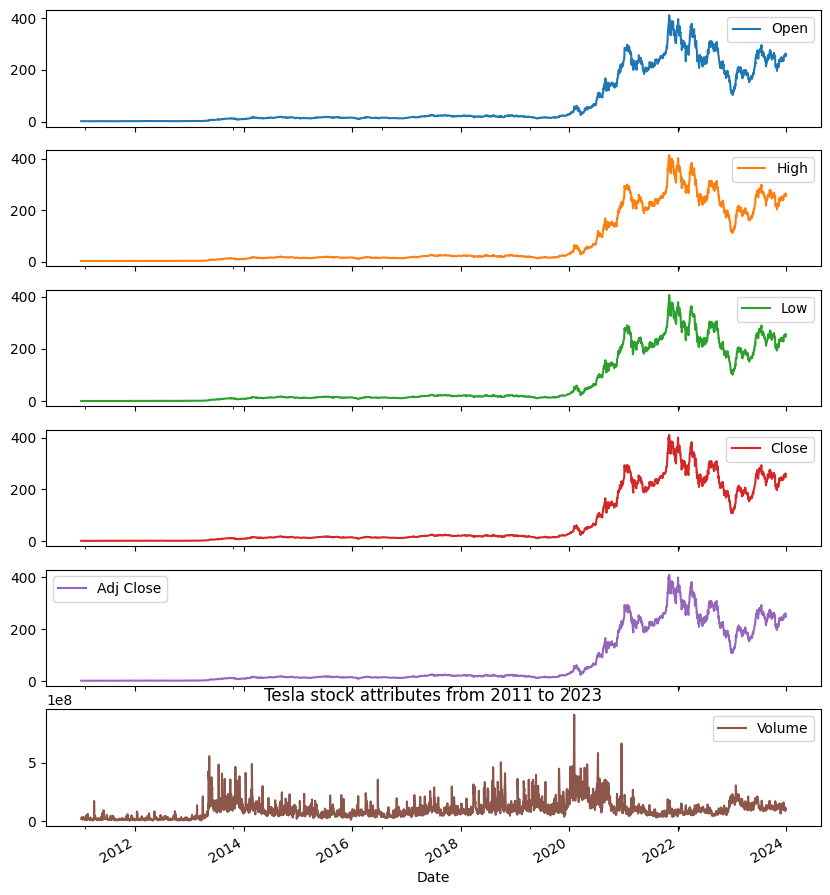

In [25]:
tesla['2011':'2023'].plot(subplots=True, figsize=(10,12))
plt.title('Tesla stock attributes from 2011 to 2023')
plt.savefig('stocks.png')
plt.show()

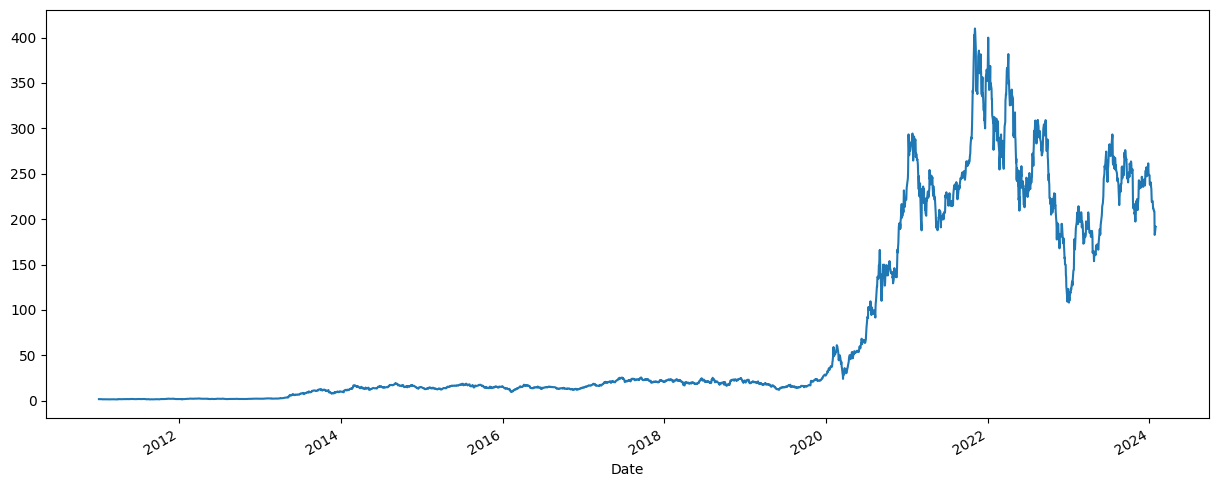

In [26]:
tesla['Adj Close'].plot(figsize=(15, 6))
plt.show()

In [27]:
z = tesla['Adj Close'].resample('MS').mean()
print(z)
z_df = pd.DataFrame(z)
z_df

Date
2011-01-01      1.709533
2011-02-01      1.555579
2011-03-01      1.580580
2011-04-01      1.744400
2011-05-01      1.840857
                 ...    
2023-09-01    256.968000
2023-10-01    236.907727
2023-11-01    229.411905
2023-12-01    247.137998
2024-01-01    217.572501
Freq: MS, Name: Adj Close, Length: 157, dtype: float64


,Adj Close
Date,
2011-01-01,1.709533
2011-02-01,1.555579
2011-03-01,1.580580
2011-04-01,1.744400
2011-05-01,1.840857
...,...
2023-09-01,256.968000
2023-10-01,236.907727
2023-11-01,229.411905


#Decomposition of Time Series:

Seasonal decomposition is a valuable tool for understanding the underlying structure of time series data, improving forecasting accuracy, and aiding in decision-making across various domains.

The following graph shows the decomposition of the given time time series into the trend, seasonal and residuals components.

In [28]:
import numpy as np
import statsmodels.api as sm

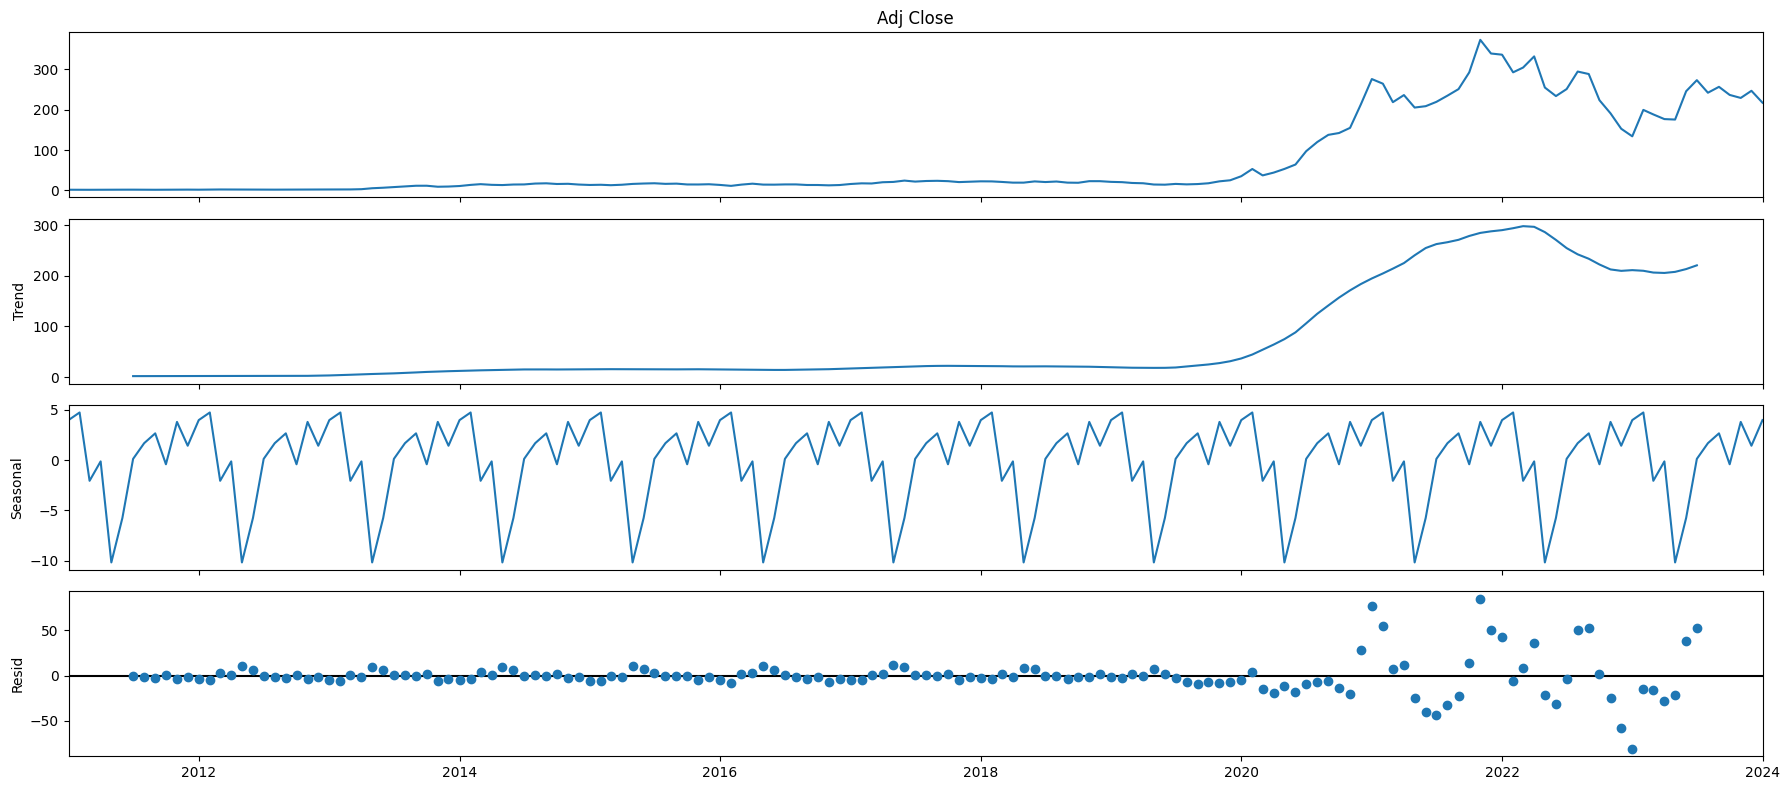

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(z, model='additive') #model = multiplication
fig = decomposition.plot()
plt.show()

In [30]:
tesla['Adj Close'].isna().sum()

0

#Some financial analysis:

Generlly, the financial analysis, such as  percentage change, stock returns in times eries, is done to measure performance, risk management, comparative advantage etc. Let's do the following financial anlysis.

# Percent change

<Axes: xlabel='Date'>

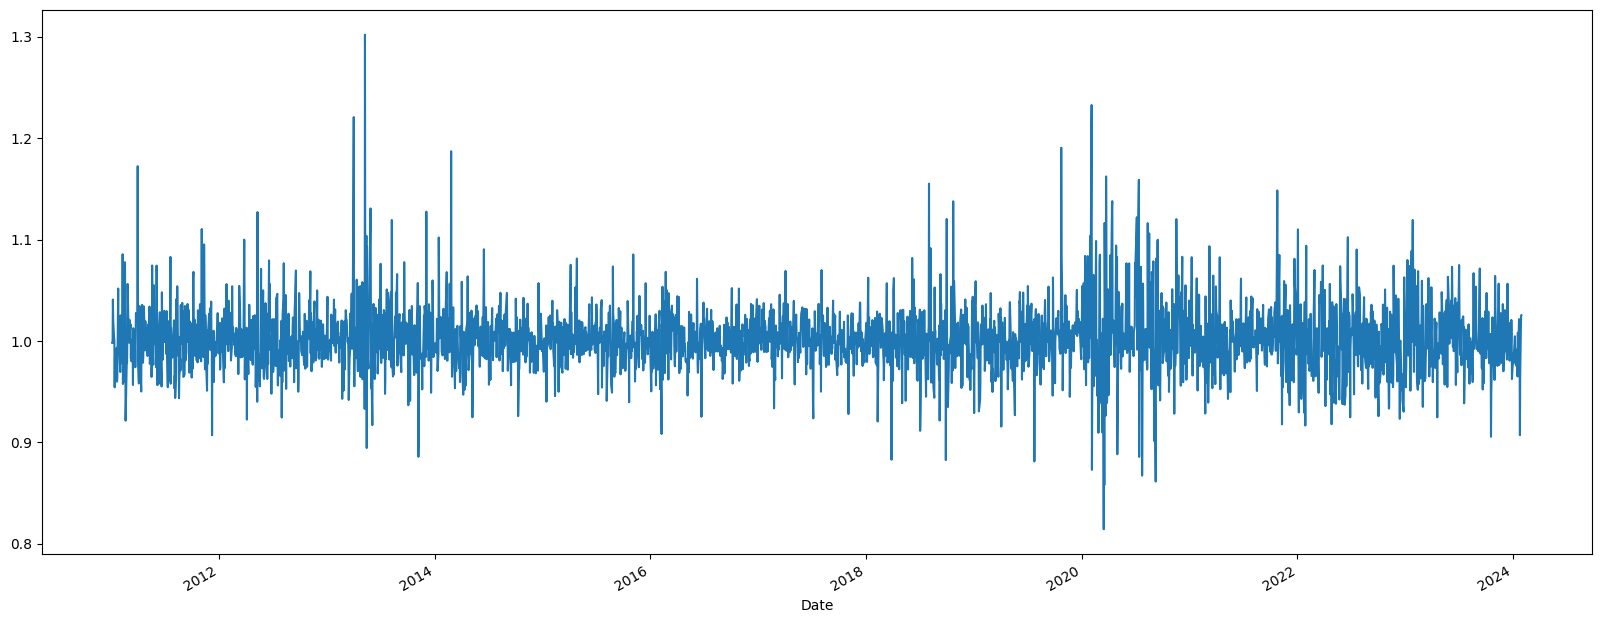

In [31]:
tesla['Change'] = tesla.High.div(tesla.High.shift())
tesla['Change'].plot(figsize=(20,8))
#calculates the percentage change in the 'High' price of Tesla stock (assuming tesla is a DataFrame containing stock data for Tesla) and assigns the result to a new column named 'Change' in the tesla DataFrame.

#Stock returns

<Axes: xlabel='Date'>

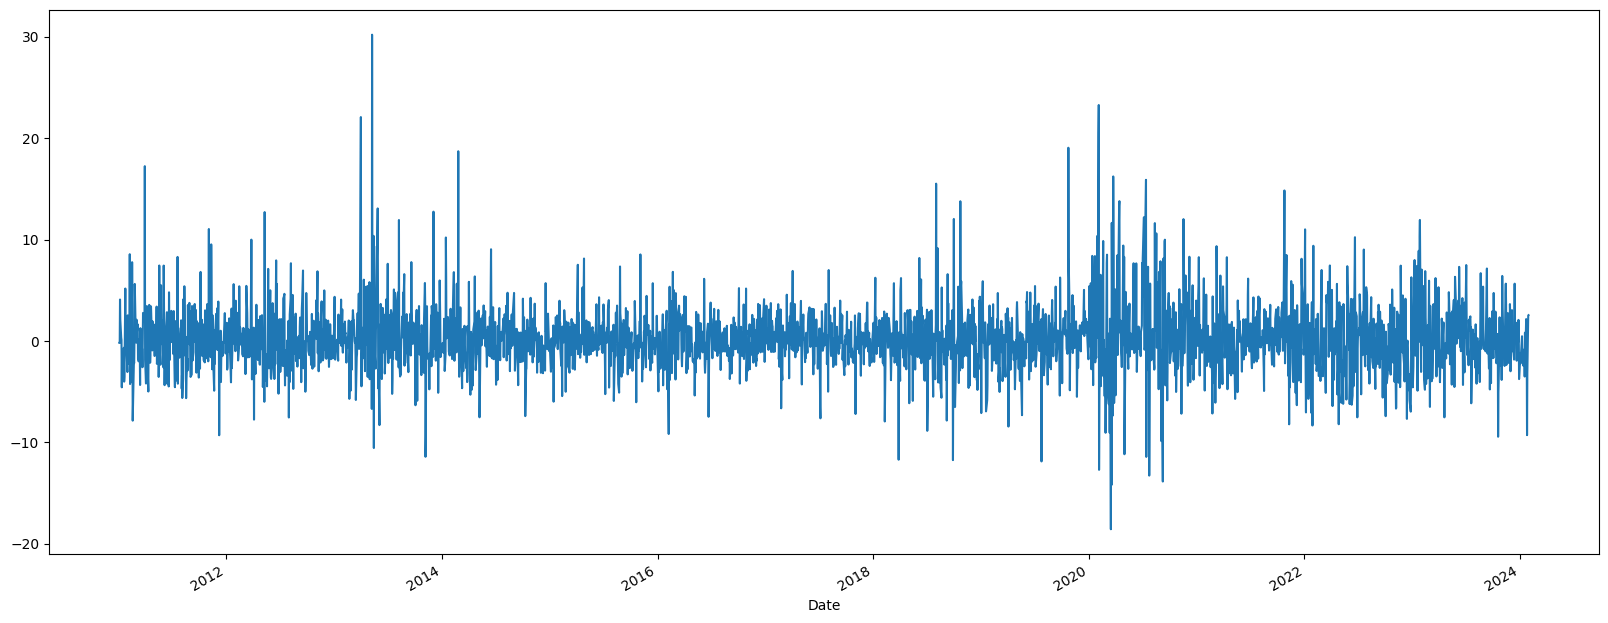

In [32]:
tesla['Return'] = (tesla['Change'] - 1) * 100
tesla['Return'].plot(figsize=(20,8))
#The code snippet tesla['Return'] = tesla.Change.sub(1).mul(100) calculates the returns (percentage change) of the Tesla stock
#based on the percentage change previously calculated in the 'Change' column (assuming tesla is a DataFrame containing stock data for Tesla).
#This plot would give you a visual representation of how the returns of Tesla stock are changing over time, showing the percentage returns from one period to the next.
# It helps in analyzing the performance or volatility of Tesla stock.

In [33]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000,NaN,NaN
2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000,0.998148,-0.185165
2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500,0.998144,-0.185562
2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000,1.040893,4.089256
2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500,1.020714,2.071393


<Axes: xlabel='Date'>

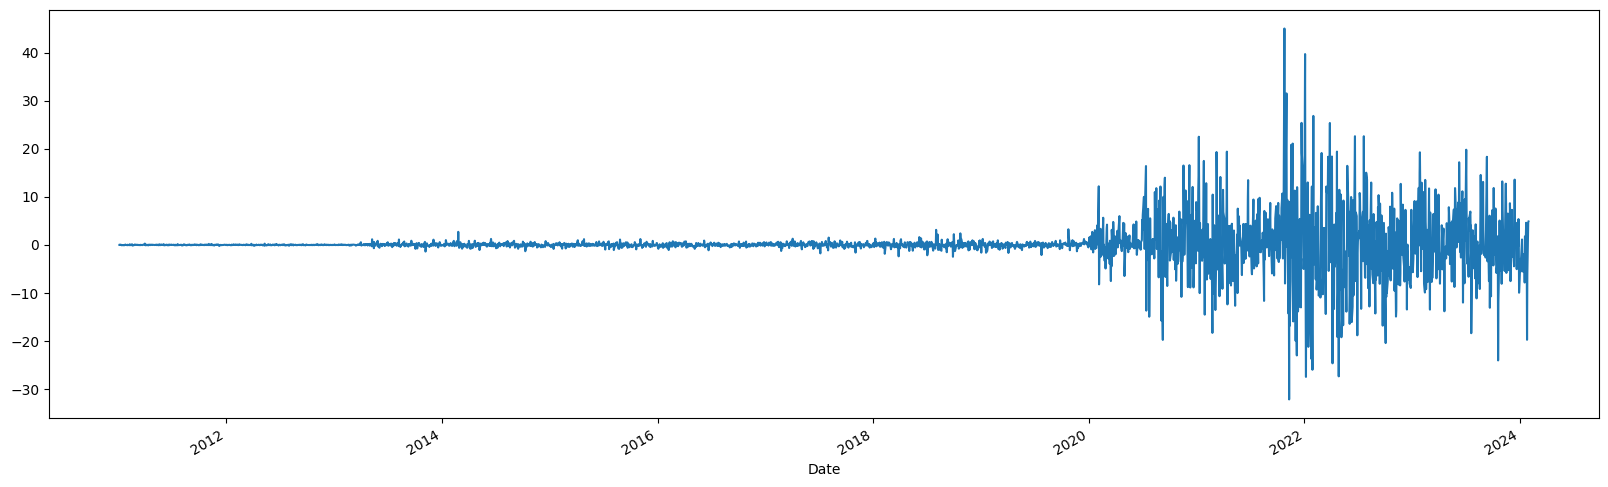

In [34]:
#calculates the difference between consecutive values in the 'High' column of the Tesla stock data (assuming tesla is a DataFrame containing stock data for Tesla)
#and plots the result as a line plot with a specified figure size of 20 inches in width and 6 inches in height.
tesla.High.diff().plot(figsize=(20,6))

 **Window functions**

 Window functions, also known as rolling or moving functions, are used in time series analysis for

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling

Same size and sliding

Expanding

Contains all prior values


In time series analysis, the rolling mean (also known as the moving average) is a statistical technique used to smooth out fluctuations in data and identify trends or patterns over time. It calculates the average value of a specified window of data points as it moves through the time series.

#Comparing the high value of a time series with the rolling mean:
 It provides insights into how extreme or exceptional the high value is relative to the recent trend or average of the data. Specifically, it helps in identifying instances where the high value significantly deviates from the expected or typical behavior of the time series.

On the other hand, the varying rolling standard deviation, rolling mean also indicate the non-stationarity of the time series.

  So, let's do the rolling mean function analysis below.

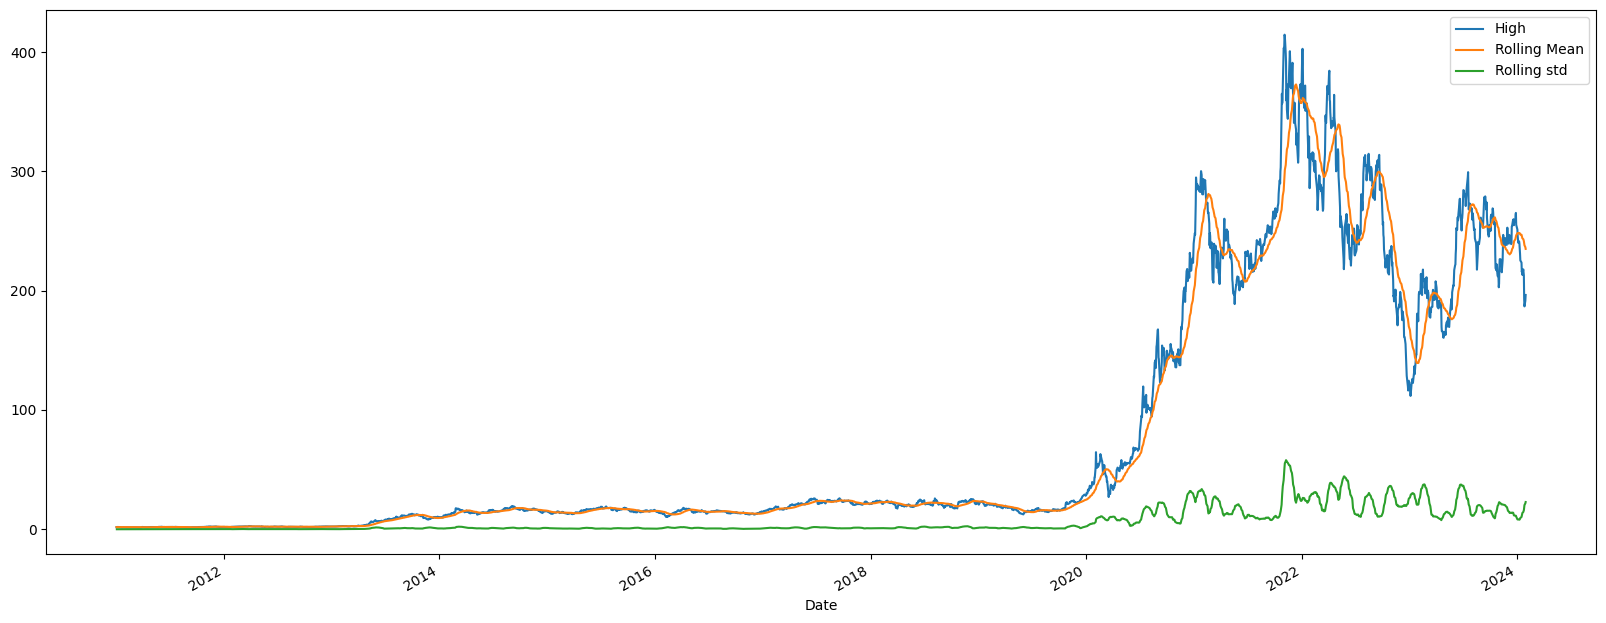

In [35]:
# Rolling window functions
rolling_tesla_mean = tesla.High.rolling('50D').mean()
rolling_tesla_std = tesla.High.rolling('50D').std()
tesla.High.plot(figsize=(20,8))
rolling_tesla_mean.plot(figsize=(20,8))
rolling_tesla_std.plot(figsize=(20,8))
plt.legend(['High','Rolling Mean','Rolling std'])
#The rolling mean (also known as the moving average) is smoother than the original series because it reduces short-term fluctuations or noise in the data by averaging adjacent data points over a specified window size.

#Expanding window functions:
 Expanding window functions, also known as cumulative window functions, are a type of window function used in time series analysis. Unlike fixed-size rolling window functions where a fixed number of data points are included in each window, expanding window functions include all preceding data points up to the current observation in each window. In other words, the size of the window grows with each new observation, hence the term "expanding."

 So, let's do the Expanding window function analysis below.

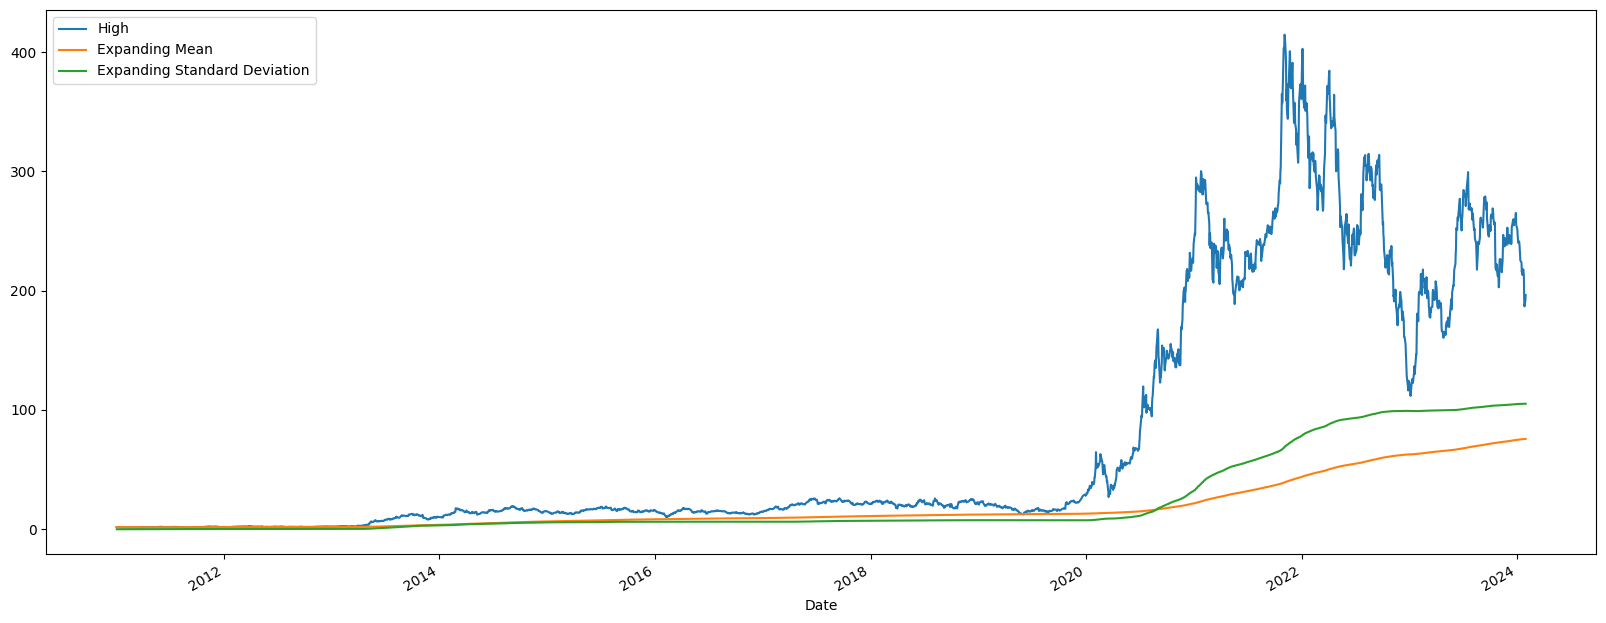

In [36]:
# Expanding window functions
tesla_mean = tesla.High.expanding().mean()
tesla_std = tesla.High.expanding().std()
tesla.High.plot(figsize=(20,8))
tesla_mean.plot(figsize=(20,8))
tesla_std.plot(figsize=(20,8))
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()
#Expanding Mean: cumulative mean--from today to 90 days, from today to 91 days--always staring from begining until today,

We see that the expanding standard deviation is above the expading mean in the positive upward trend. Hence, this stock seems to be profitable.

#OHLC charts:

OHLC are essential for understanding the price movements of a financial asset over a specific period, typically within a trading day.

An OHLC chart, also known as an Open-High-Low-Close chart, is a type of financial chart used to represent the price movements of a financial instrument, such as a stock, commodity, or currency, over a specific time period. It displays four key price points for each period: the opening price (Open), highest price (High), lowest price (Low), and closing price (Close).

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). On the range symbol, the high and low price ranges are represented by the length of the main vertical line. The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Color can also be assigned for each OHLC Chart symbol to distinguish whether the market is "bullish" .

closing price >  opene price--"bullish" market.

 the closing price <  opene price --- "bearish" market.

Let's do the OHLC analysis.

In [37]:
from pylab import rcParams # customization of figure based on the Matplotlib/pylab library such as figure size, line styles, font properties, and more.
from plotly import tools
!pip install plotly yfinance
!pip install chart-studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


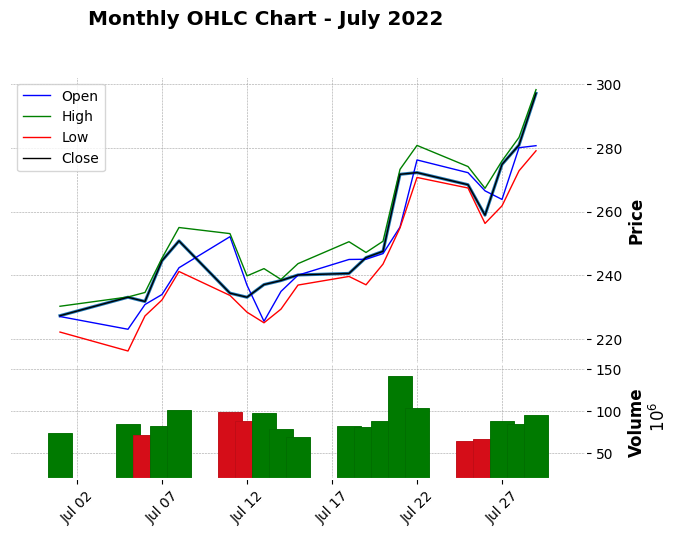

In [38]:
!pip install mplfinance
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for July 2022
start_date = '2022-07-01'
end_date = '2022-07-31'
tesla_july_2022 = tesla[start_date:end_date]

# Convert DataFrame to a format suitable for mplfinance
ohlc_data = tesla_july_2022[['Open', 'High', 'Low', 'Close', 'Volume']]
ohlc_data.index.name = 'Date'

# Create a custom legend with labels
custom_legend = [
    mpf.make_addplot(ohlc_data['Open'], panel=0, secondary_y=False, color='blue', label='Open',width=1),
    mpf.make_addplot(ohlc_data['High'], panel=0, secondary_y=False, color='green', label='High', width=1),
    mpf.make_addplot(ohlc_data['Low'], panel=0, secondary_y=False, color='red', label='Low',width=1),
    mpf.make_addplot(ohlc_data['Close'], panel=0, secondary_y=False, color='black', label='Close',width=1),
]

# Plot the OHLC lines with custom legend
mpf.plot(ohlc_data, type='line', style='charles', title='Monthly OHLC Chart - July 2022', ylabel='Price',
         ylabel_lower='Volume', volume=True, show_nontrading=True, addplot=custom_legend)

# Show the plot
plt.show()

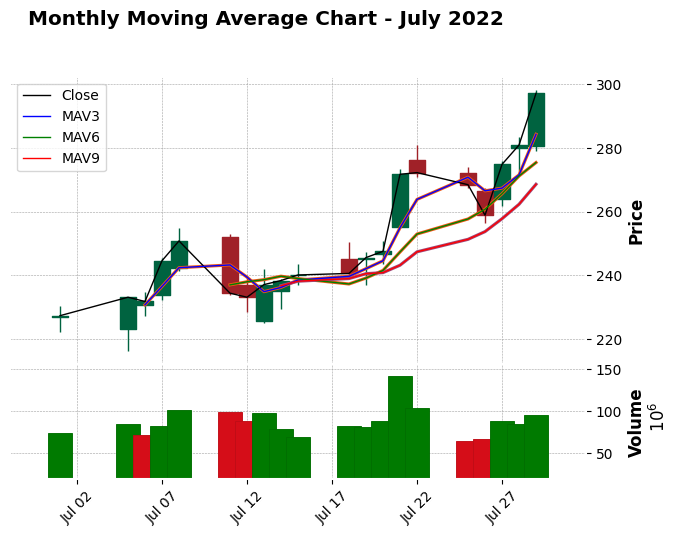

In [39]:
# Filter the data for July 2022
start_date = '2022-07-01'
end_date = '2022-07-31'
tesla_july_2022 = tesla[start_date:end_date]

# Convert DataFrame to a format suitable for mplfinance
ohlc_data = tesla_july_2022[['Open', 'High', 'Low', 'Close', 'Volume']]
ohlc_data.index.name = 'Date'

# Calculate moving averages
for i in [3, 6, 9]:
    ohlc_data[f'MAV{i}'] = ohlc_data['Close'].rolling(window=i).mean()

# Create a custom legend with labels
custom_legend = [
    mpf.make_addplot(ohlc_data['Close'], panel=0, secondary_y=False, color='black', label='Close',width=1),
    mpf.make_addplot(ohlc_data['MAV3'], panel=0, secondary_y=False, color='blue', label='MAV3',width=1),
    mpf.make_addplot(ohlc_data['MAV6'], panel=0, secondary_y=False, color='green', label='MAV6',width=1),
    mpf.make_addplot(ohlc_data['MAV9'], panel=0, secondary_y=False, color='red', label='MAV9',width=1),
]

# Plot the OHLC chart with custom legend
mpf.plot(ohlc_data, type='candle', style='charles', mav=(3, 6, 9), title='Monthly Moving Average Chart - July 2022', ylabel='Price',
         ylabel_lower='Volume', volume=True, show_nontrading=True, addplot=custom_legend)

# Show the plot
plt.show()

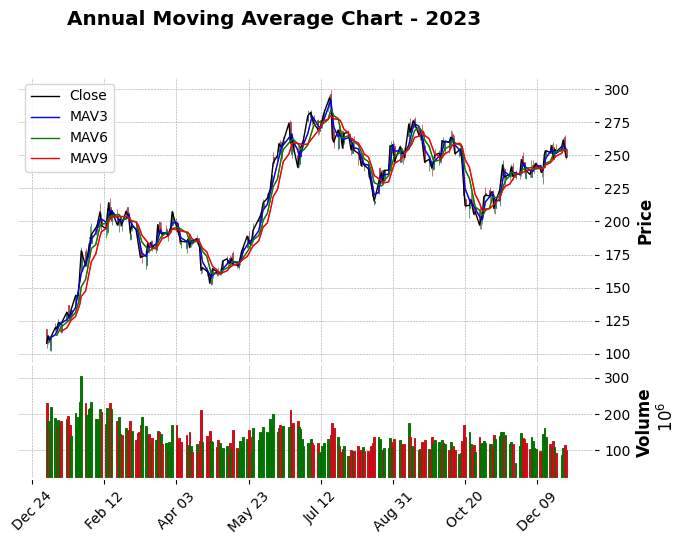

In [40]:
# Define start date and end date for filtering the data
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the data for the year 2023 based on the specified start and end dates
tesla_2023 = tesla[start_date:end_date]

# Convert DataFrame to a format suitable for mplfinance
ohlc_data = tesla_2023[['Open', 'High', 'Low', 'Close', 'Volume']]
ohlc_data.index.name = 'Date'

# Calculate moving averages
for i in [3, 6, 9]:
    ohlc_data[f'MAV{i}'] = ohlc_data['Close'].rolling(window=i).mean()

# Create a custom legend with labels
custom_legend = [
    mpf.make_addplot(ohlc_data['Close'], panel=0, secondary_y=False, color='black', label='Close', width=1),
    mpf.make_addplot(ohlc_data['MAV3'], panel=0, secondary_y=False, color='blue', label='MAV3', width=1),
    mpf.make_addplot(ohlc_data['MAV6'], panel=0, secondary_y=False, color='green', label='MAV6', width=1),
    mpf.make_addplot(ohlc_data['MAV9'], panel=0, secondary_y=False, color='red', label='MAV9', width=1),
]

# Plot the OHLC chart with custom legend
mpf.plot(ohlc_data, type='candle', style='charles', mav=(3, 6, 9), title='Annual Moving Average Chart - 2023', ylabel='Price',
         ylabel_lower='Volume', volume=True, show_nontrading=True, addplot=custom_legend)

# Show the plot
plt.show()

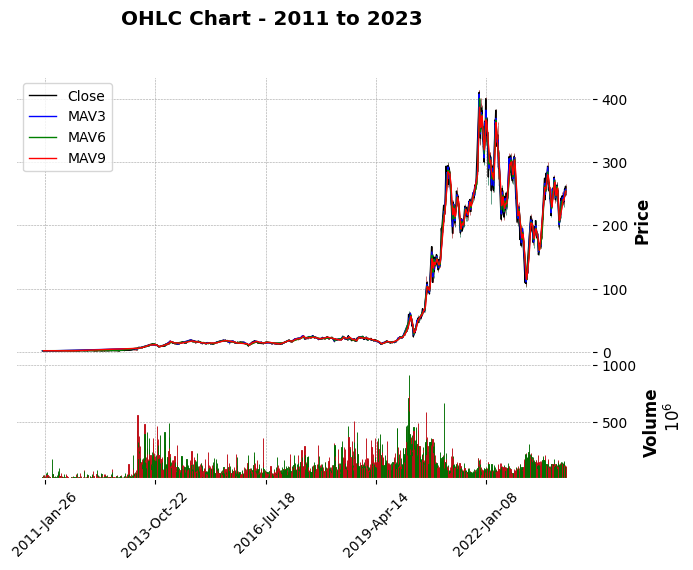

In [41]:
# Assuming 'tesla' is a DataFrame containing OHLC data for Tesla stock
# and the index of 'tesla' is a DateTimeIndex

# Define start date and end date for filtering the data
start_date = '2011-01-01'
end_date = '2023-12-31'

# Filter the data from January 1, 2011, to December 31, 2023
tesla_filtered = tesla[start_date:end_date]

# Convert DataFrame to a format suitable for mplfinance
ohlc_data = tesla_filtered[['Open', 'High', 'Low', 'Close', 'Volume']]
ohlc_data.index.name = 'Date'

# Calculate moving averages
for i in [3, 6, 9]:
    ohlc_data[f'MAV{i}'] = ohlc_data['Close'].rolling(window=i).mean()

# Create a custom legend with labels
custom_legend = [
    mpf.make_addplot(ohlc_data['Close'], panel=0, secondary_y=False, color='black', label='Close', width=1),
    mpf.make_addplot(ohlc_data['MAV3'], panel=0, secondary_y=False, color='blue', label='MAV3', width=1),
    mpf.make_addplot(ohlc_data['MAV6'], panel=0, secondary_y=False, color='green', label='MAV6', width=1),
    mpf.make_addplot(ohlc_data['MAV9'], panel=0, secondary_y=False, color='red', label='MAV9', width=1),
]

# Plot the OHLC chart with custom legend
mpf.plot(ohlc_data, type='candle', style='charles', mav=(3, 6, 9), title='OHLC Chart - 2011 to 2023',
         ylabel='Price', ylabel_lower='Volume', volume=True, show_nontrading=True, addplot=custom_legend)

 **Stationarity**:

 Stationarity implies that the statistical properties of a process generating a time series do not change over time. Some of the tools to check the the statioanrity are ACF, PACF, which are shown below.



#**Autocorrelation (ACF) and Partial Autocorrelation (PACF)**

#Autocorrelation--AR

The ACF plot is a graphical representation of the correlation of a time series with itself at different lags. The correlation coefficient is a measure of how closely two variables are related. A correlation coefficient of 1 indicates a perfect positive relationship, while a correlation coefficient of -1 indicates a perfect negative relationship. A correlation coefficient of 0 indicates no relationship between the two variables.

The ACF plot can be used to identify the order of an AR model. The order of an AR model is the number of lags that are included in the model. The ACF plot will show spikes at the lags that are included in the model.

#PACF plot--MA

The PACF plot is a graphical representation of the correlation of a time series with itself at different lags, after removing the effects of the previous lags. The PACF plot can be used to identify the order of an MA model. The order of an MA model is the number of lags that are included in the model. The PACF plot will show spikes at the lags that are included in the model.




#Autocorrelation

In [42]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf  # Import plot_acf from statsmodels

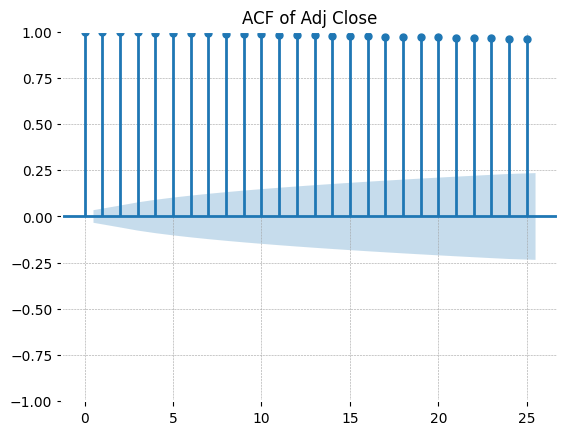

In [43]:
plot_acf(tesla["Adj Close"],lags=25,title="ACF of Adj Close")
plt.show()

With  25 lags with a positive correlation above 0.25 there's a good chance that the time series has a stochastic trend, and will need a significant level of differencing to achieve stationarity. An autocorrelation of almost 1 indicates that the current values of the time series can better be estimated using its past lagged values.

#Partial Autocorrelation

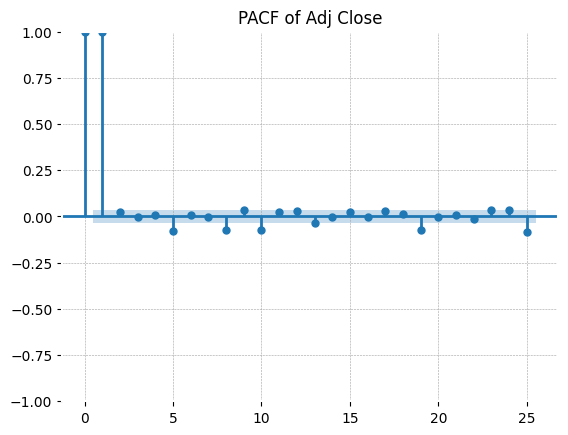

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf  # Import plot_pacf from statsmodels
plot_pacf(tesla["Adj Close"],lags=25,title="PACF of Adj Close")
plt.show()


For the PACF, the two positive partial autocorrelations indicate that the higher-order of autocorrelations are essentially explained by the lag of 1 autocorrelation. With two significant PACF lags followed by the continuos lags within the CI indicates that the series is an AR(1) process. Hence, the number of lags are determined by the number of significant lags of PACF.

The autocorrelations are significant for a large number of lags--but perhaps the autocorrelations at lags 2 and above are merely due to the propagation of the autocorrelation at lag 1. This is confirmed by the PACF plot:

Since there is no clear-cut result about the lags of the MA model because of continuously persistant autocorrelation, we are going to choose the auto-lag-selection ARIMA model.

#Building the Auto-ARIMA Model:

In [45]:
!pip install pmdarima
from pmdarima.arima.utils import ndiffs

# Calculate the number of differences needed for stationarity
d_val = ndiffs(tesla['Adj Close'], test='adf')

# Print the calculated differencing parameter
print('Arima D-value:', d_val)
#type of test to be used for determining the number of differences needed to achieve stationarity.
#In this case, 'adf' stands for the Augmented Dickey-Fuller (ADF) test.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.8 MB/s eta 0:00:00
Arima D-value: 1


In [46]:
from pmdarima.arima import auto_arima
import pmdarima as pm

In [47]:
#splitting the data to train and test sets based on Ntest value
#last 500 days
Ntest = 500
train = tesla.iloc[:-Ntest]
test = tesla.iloc[-Ntest:]
train_idx = tesla.index <= train.index[-1]
test_idx = tesla.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Adj Close'],
                      d =d_val ,
                      start_p = 0,
                      max_p = 5,
                      start_q = 0,
                      max_q = 5,
                      stepwise=False,
                      max_order=5,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15115.199, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=15113.568, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=15115.054, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=15109.624, Time=0.90 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=15111.260, Time=1.32 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=15107.839, Time=2.09 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=15113.682, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=15115.435, Time=1.35 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=15104.619, Time=1.85 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=15103.491, Time=3.02 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=15105.362, Time=3.57 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=15114.745, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=15103.753, Time=2.33 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=7.48 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=15104.019, Time=3.55 sec
 

In [48]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

#**Predicting the Auto-ARIMA model**

In [49]:
# Make predictions
forecast, conf_int = model.predict(n_periods=10, return_conf_int=True)

In [50]:
print("Forecasted Values:")
print(forecast)
#print(forecast.values)

Forecasted Values:
2790    311.943849
2791    311.918030
2792    312.019058
2793    312.189525
2794    312.247599
2795    312.399809
2796    312.481132
2797    312.613511
2798    312.709671
2799    312.831361
dtype: float64


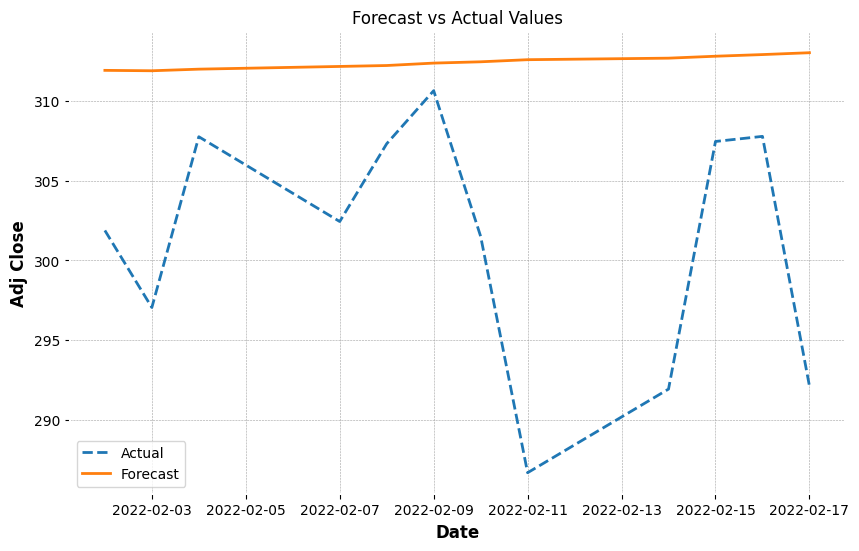

,Actual,Forecast
Date,,
2022-02-02,301.886658,311.943849
2022-02-03,297.046661,311.918030
2022-02-04,307.773346,312.019058
2022-02-07,302.446655,312.189525
2022-02-08,307.333344,312.247599
2022-02-09,310.666656,312.399809
2022-02-10,301.516663,312.481132
2022-02-11,286.666656,312.613511
2022-02-14,291.920013,312.709671


In [51]:
# Make predictions for the next 12 periods
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

# Convert the index of the forecast to datetime for plotting
forecast_index = pd.date_range(start=test.index[0], periods=len(forecast), freq='B')

# Create a DataFrame with forecast and actual values
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Extract actual values from the test set with the same index as forecast_df
actual_values = test.loc[forecast_df.index, 'Adj Close']

# Plot forecast and actual values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values, label='Actual', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Display the forecast and actual values
model_df = pd.concat([ pd.DataFrame({'Actual': actual_values}),forecast_df], axis=1)
model_df

In [52]:
print(conf_int)

[[304.8480091  319.03968795]
 [302.0369004  321.79915948]
 [300.05468076 323.98343514]
 [298.28276335 326.09628717]
 [296.76582046 327.72937738]
 [295.40047532 329.39914366]
 [294.14829164 330.81397249]
 [292.99848588 332.22853688]
 [291.91744572 333.50189685]
 [290.90766546 334.75505645]
 [289.94721969 335.92298104]
 [289.03865963 337.06423605]]


In [53]:
forecast.index = pd.to_datetime(forecast)
forecast.index

DatetimeIndex(['1970-01-01 00:00:00.000000311',
               '1970-01-01 00:00:00.000000311',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000312',
               '1970-01-01 00:00:00.000000313'],
              dtype='datetime64[ns]', freq=None)

#**Comparing Actual, fitted and predicted values in the graph**:

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [55]:
def plot_result(model, data, col_name, Ntest):

    params = model.get_params()
    d = params['order'][1]

    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)

    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()

    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Root Mean Squared Error:  119.69709761688591
Mean Absolute Error:  106.82049353712392


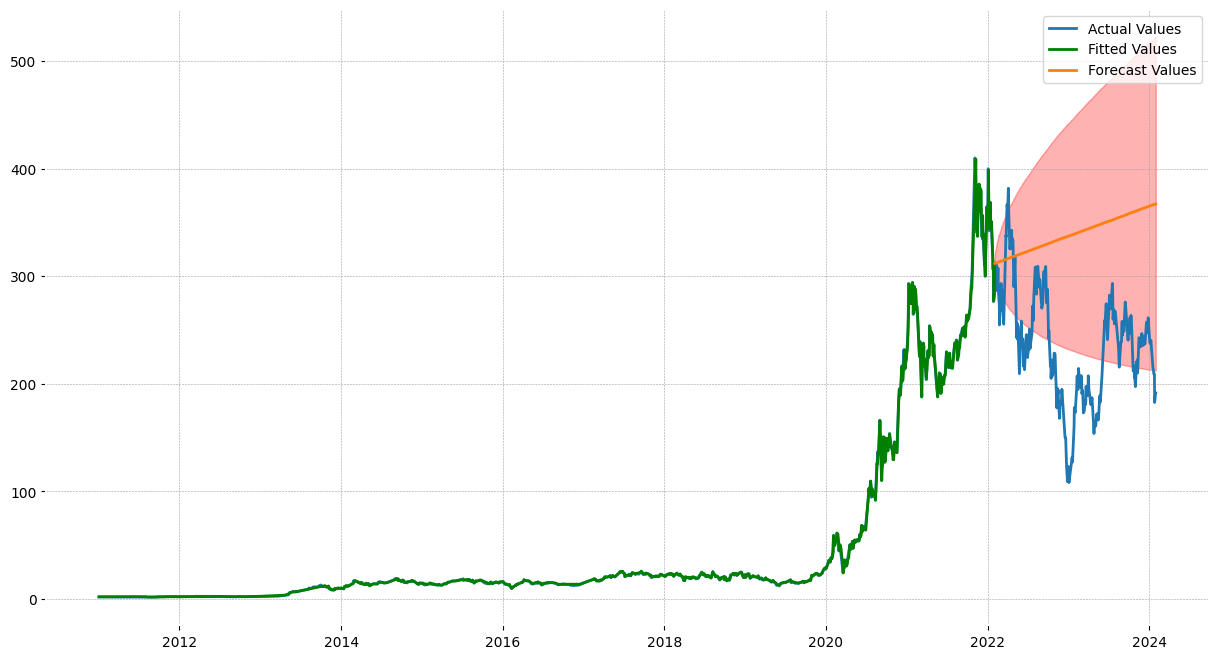

In [56]:
rmse , mae = plot_result(model, tesla, 'Close', Ntest=500)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

#**Diagnostics test**: Testing the Performance and the assumptions of the ARIMA model

Top-left Plot (Standardized Residuals over Time):

This plot shows the standardized residuals over time. Residuals are the differences between the actual values and the values predicted by the model. Standardized residuals are normalized versions of these differences.
Ideally, you want the residuals to be randomly scattered around zero, indicating that the model captures the underlying patterns in the data.

Top-right Plot (Kernel Density Estimate of Residuals):

This is a kernel density estimate (KDE) of the distribution of the standardized residuals. It provides an overview of the shape of the distribution.
A normal distribution is desirable, suggesting that the residuals follow a Gaussian (bell-shaped) distribution. Any deviations from normality may indicate issues with the model.

Bottom-left Plot (QQ Plot):

The QQ (Quantile-Quantile) plot compares the quantiles of the standardized residuals with the quantiles of a theoretical normal distribution.
Ideally, the points should fall along a straight line. Deviations from the line suggest departures from normality.

Bottom-right Plot (Correlogram or Autocorrelation Function):
This plot displays the autocorrelation function (ACF) of the standardized residuals.

The blue shaded region represents the 95% confidence interval. Residuals outside this interval may indicate significant autocorrelation.

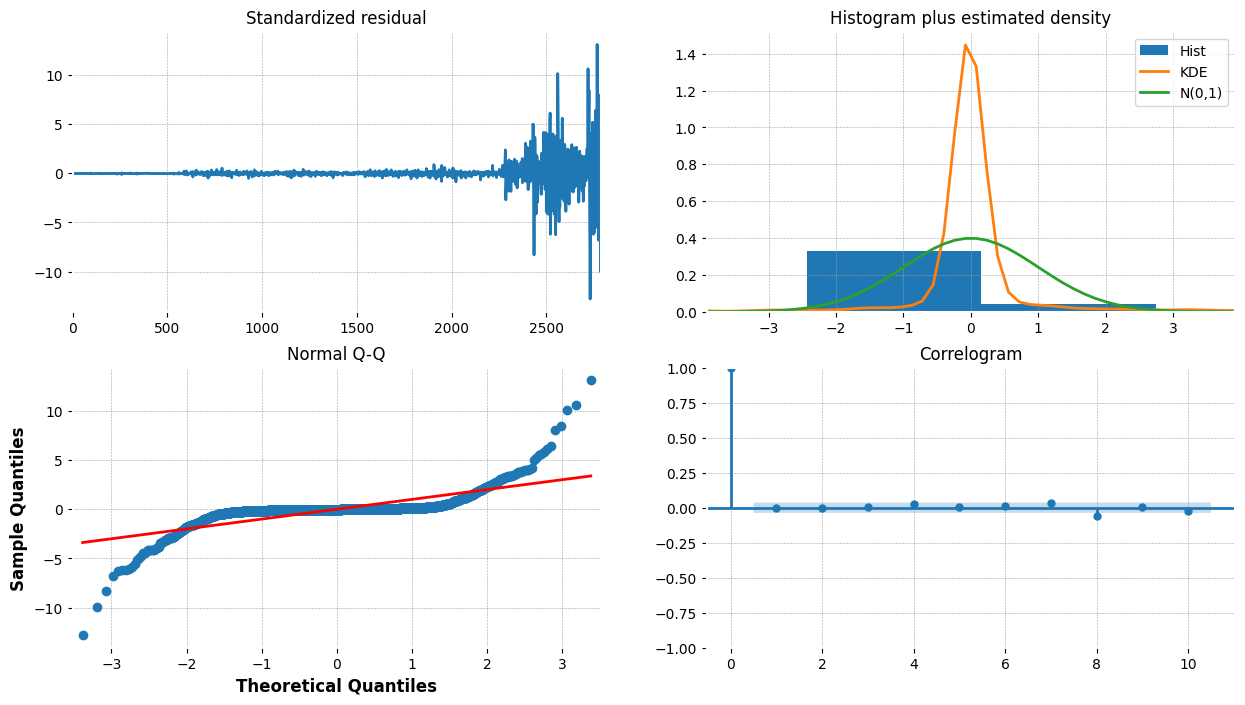

In [57]:
model.plot_diagnostics(figsize=(15,8))
plt.show()

#**Improving the model setting the SARIMAX model**: Considering the seasonality componet of the time series in the Auto-ARIMA Model

In [58]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000,NaN,NaN
2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000,0.998148,-0.185165
2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500,0.998144,-0.185562
2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000,1.040893,4.089256
2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500,1.020714,2.071393


In [60]:
y = tesla['Adj Close'].resample('MS').mean()

In [61]:
y['2015':]

Date
2015-01-01     13.550367
2015-02-01     14.044877
2015-03-01     12.981212
2015-04-01     14.107429
2015-05-01     16.148033
                 ...    
2023-09-01    256.968000
2023-10-01    236.907727
2023-11-01    229.411905
2023-12-01    247.137998
2024-01-01    217.572501
Freq: MS, Name: Adj Close, Length: 109, dtype: float64

#Visualizing Tesla time series data

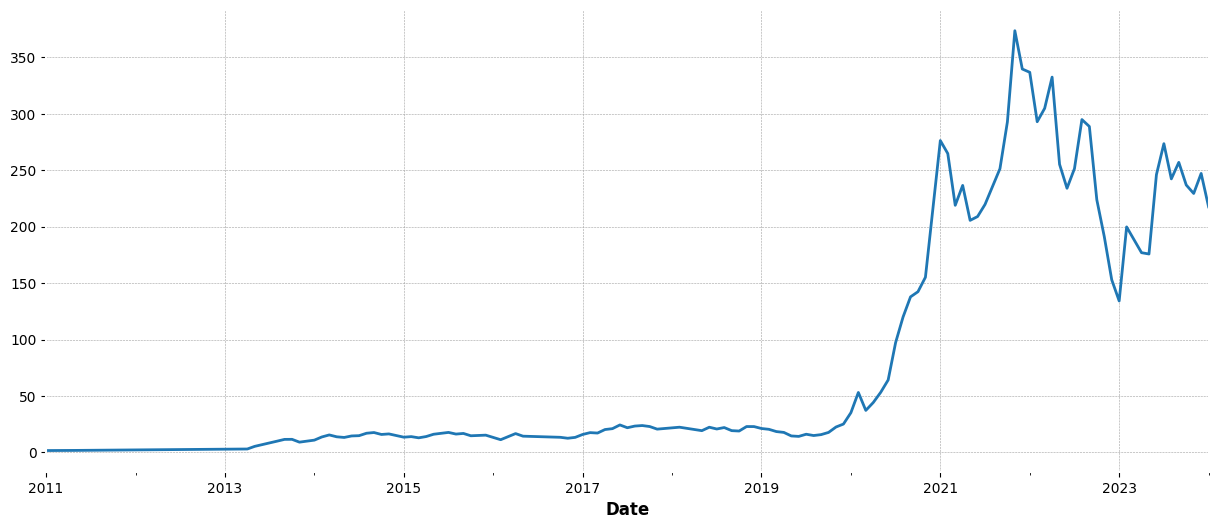

In [62]:
y.plot(figsize=(15, 6))
plt.show()

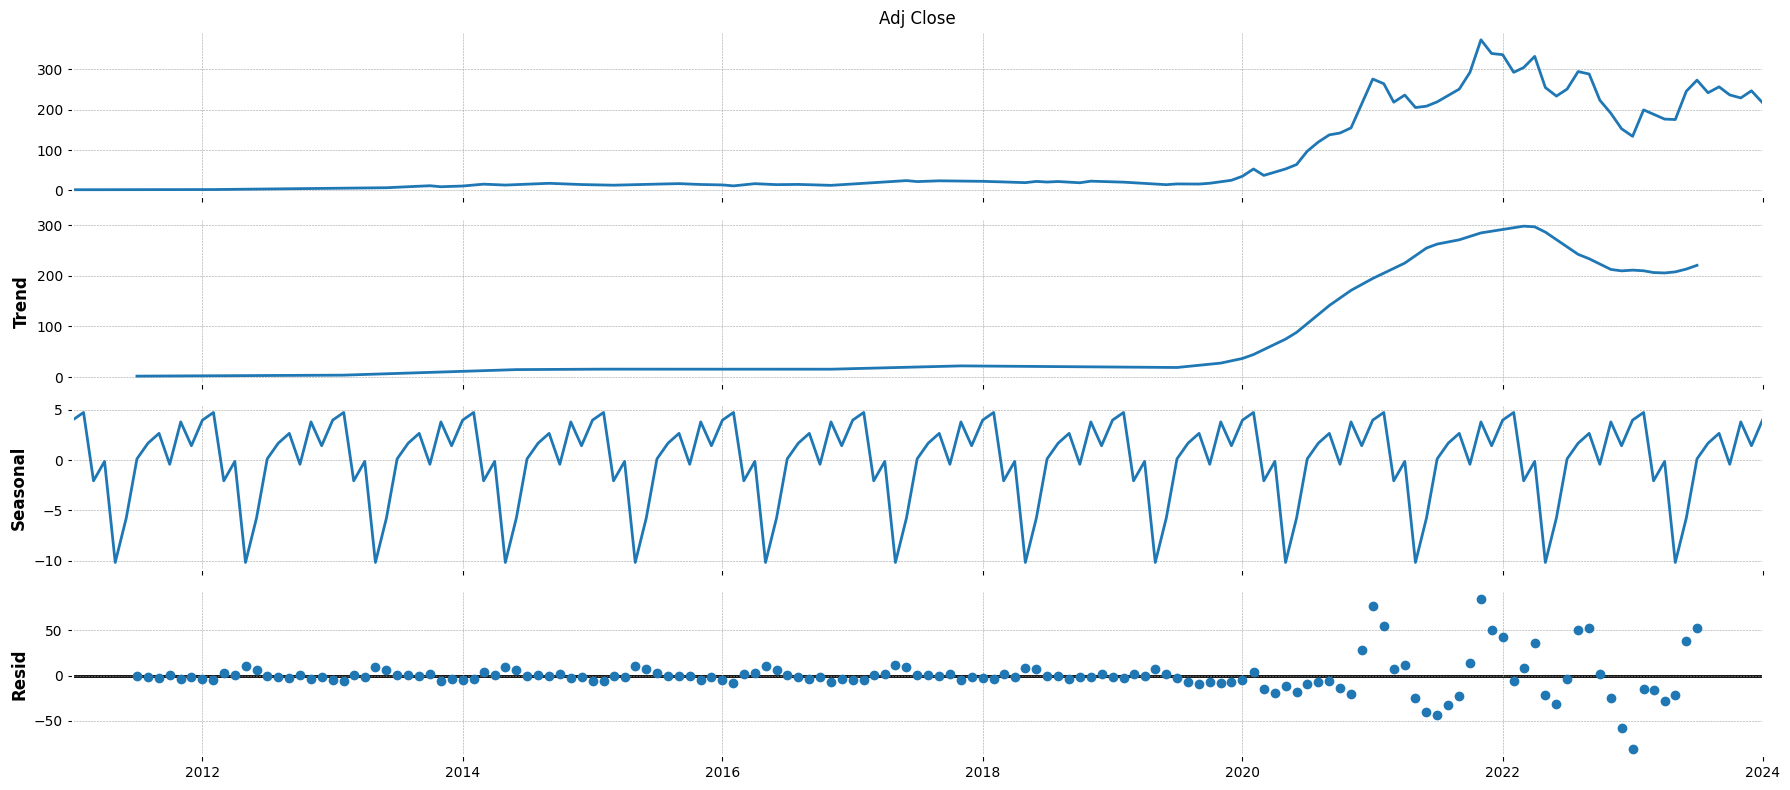

In [63]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#Parameter Selection for the SARIMA Time Series Model

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1351.7784390206862
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1183.425143002381
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1087.8607955939915
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1227.0416696046868
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1189.1124301165132
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1088.9707503710006
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1095.6806187770285
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1090.1314050288354
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1083.1175966067053
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1330.4067083770685
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1172.0371649640433
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1077.273984044226
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1220.484833331699
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1174.0225776533357
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1078.3914379650946
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1087.8491176981
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1086.353413517519
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1071.457008306639


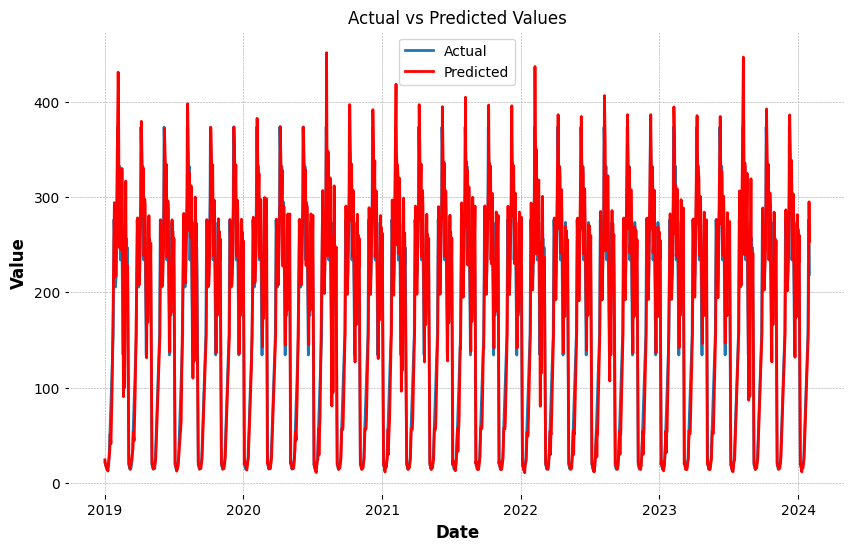

,Actual,Predicted
Date,,
2019-01-01,21.232952,23.990120
2019-01-02,20.515228,21.045888
2019-01-03,18.517143,19.195626
2019-01-04,17.777048,16.769778
2019-01-05,14.647697,17.782342
...,...,...
2024-01-27,155.204166,147.505453
2024-01-28,212.939545,157.944156
2024-01-29,276.258947,227.318227


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm

# Assuming 'y' is your time series data

# Define parameters for SARIMAX model
p = q = range(0, 3)
d = [1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Initialize lists to store actual and predicted values
actual_values = []
predicted_values = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            # Make predictions
            pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
            pred_ci = pred.conf_int()

            # Store actual and predicted values
            actual_values.extend(y['2019-01-01':].values)
            predicted_values.extend(pred.predicted_mean.values)

        except Exception as e:
            print("Error:", e)
            continue

# Convert date index into actual format
date_index = pd.date_range(start='2019-01-01', periods=len(actual_values))

# Filter data until '2024-01-31'
end_date = '2024-01-31'
filtered_index = date_index[date_index <= end_date]
filtered_actual_values = actual_values[:len(filtered_index)]
filtered_predicted_values = predicted_values[:len(filtered_index)]

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(filtered_index, filtered_actual_values, label='Actual')
plt.plot(filtered_index, filtered_predicted_values, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Create a DataFrame for actual and predicted values until '2024-01-31'
df = pd.DataFrame({'Actual': filtered_actual_values, 'Predicted': filtered_predicted_values}, index=filtered_index)
df.index.name = 'Date'
df

#Diagnostic Test:

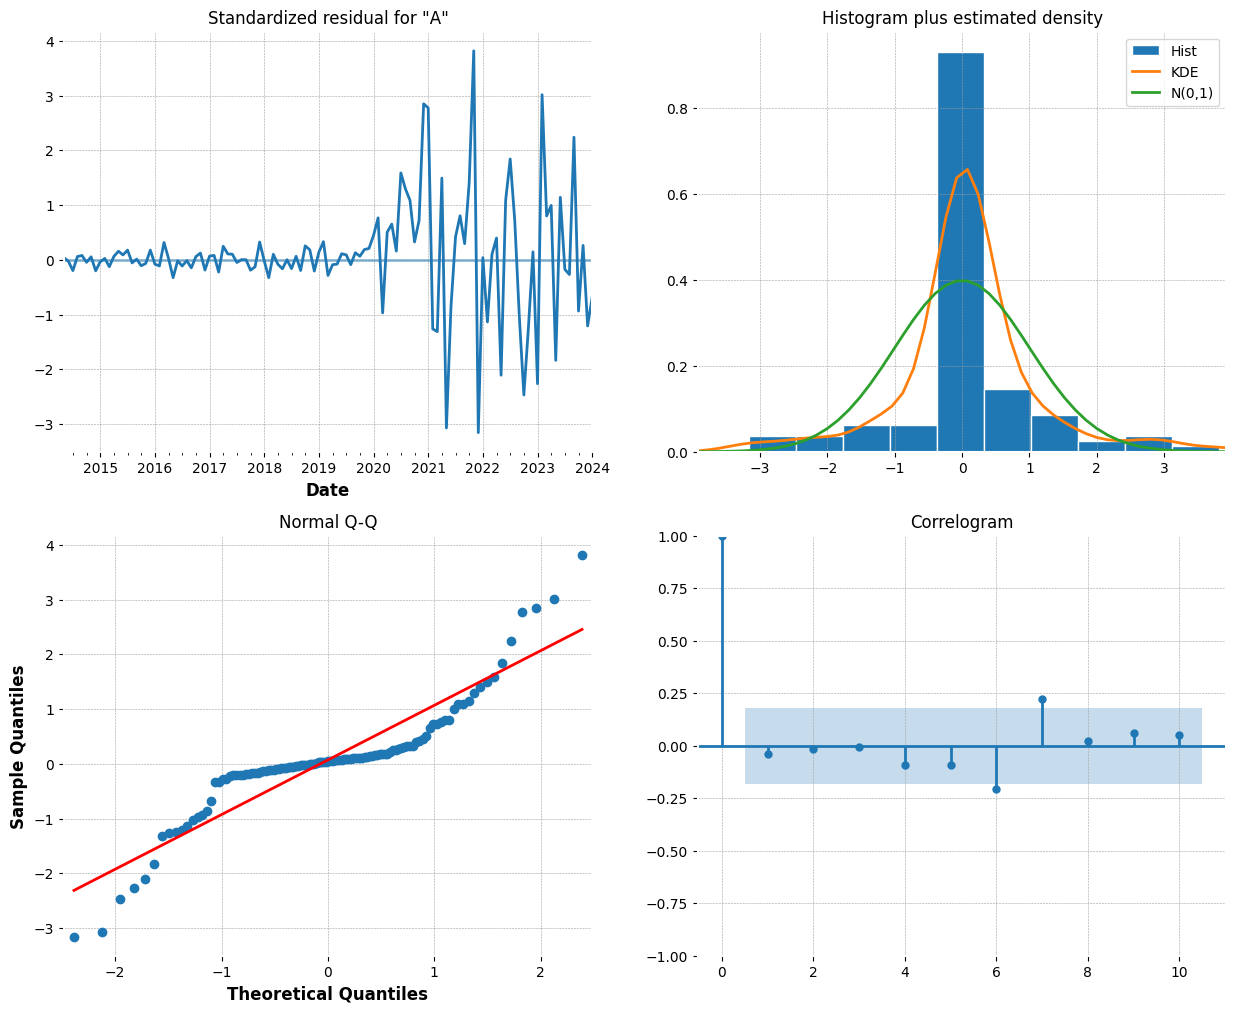

In [94]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()